In [1]:
# Import libraries

import pandas as pand
import numpy as np

import requests
from bs4 import BeautifulSoup

In [2]:
# Webscrape the website for data

dataframe = pand.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]
dataframe = dataframe[dataframe.Borough != 'Not assigned']
dataframe.shape

(210, 3)

In [3]:
# Copy dataframe

dataframe_for_toronto = dataframe.copy()

# Importing coordinates for neighborhood & adding data
location_coords = pand.read_csv (r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
location_coords.rename(columns = {'Postal Code': 'Postcode'}, inplace = True)

locate_toronto_data = pand.merge(dataframe_for_toronto, location_coords, on = 'Postcode', how = 'inner')
locate_toronto_data.shape

(210, 5)

In [4]:
locate_toronto_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
...,...,...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West,43.628841,-79.520999
206,M8Z,Etobicoke,Mimico NW,43.628841,-79.520999
207,M8Z,Etobicoke,The Queensway West,43.628841,-79.520999
208,M8Z,Etobicoke,Royal York South West,43.628841,-79.520999


In [5]:
# Import household income

toronto_income_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/income_toronto.csv'
income_path = pand.read_csv(toronto_income_url)
income_dataframe = pand.DataFrame(income_path)
income_dataframe.drop(['Neighbourhood Id'], axis = 1, inplace = True)
income_dataframe.shape

(140, 2)

In [6]:
income_dataframe

,Neighbourhood,After-Tax Household Income
0,West Humber-Clairville,59703.0
1,Mount Olive-Silverstone-Jamestown,46986.0
2,Thistletown-Beaumond Heights,57522.0
3,Rexdale-Kipling,51194.0
4,Elms-Old Rexdale,49425.0
...,...,...
135,West Hill,46803.0
136,Woburn,47908.0
137,Eglinton East,42790.0
138,Scarborough Village,40181.0


In [7]:
# Load population of Southeast Asians in Toronto neighbourhoods Skip?

pop_toronto_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/population_toronto.csv'
pop_path = pand.read_csv(pop_toronto_url)
dataframe_pop = pand.DataFrame(pop_path)
dataframe_pop.drop(['Neighbourhood Id'], axis = 1, inplace = True)
dataframe_pop.shape

(140, 2)

In [8]:
dataframe_pop

,Neighbourhood,Total Population
0,West Humber-Clairville,33312.0
1,Mount Olive-Silverstone-Jamestown,32954.0
2,Thistletown-Beaumond Heights,10360.0
3,Rexdale-Kipling,10529.0
4,Elms-Old Rexdale,9456.0
...,...,...
135,West Hill,27392.0
136,Woburn,53485.0
137,Eglinton East,22776.0
138,Scarborough Village,16724.0


In [9]:
# Chat to show averages per area

locate_stats = pand.merge(income_dataframe, dataframe_pop, on = 'Neighbourhood', how = 'inner')
final_locate_stats = pand.merge(locate_stats, locate_toronto_data, on = 'Neighbourhood', how = 'inner')
final_locate_stats.head(35)

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452


In [10]:
# Include relevant details

# Foursquare ID
CLIENT_ID = 'RKVAUDN2014ZXME2CXFJMUMNQLE1J4RS3H5DRYBCRSCFLQOW' 
# Foursquare Secret
CLIENT_SECRET = 'ME4IPSPL2KS0NKU232TJNP2I01HGEOWSTU3SBOBH5XKNAOCK'
ACCESS_TOKEN = 'OPEO55QB2L5VWCJTZNKCZAPDDJV4LWANNIGAGS3G1FSOZILE'

# Foursquare API version
VERSION = '20180605' 
# Default limit value for Foursquare API
LIMIT = 300 
categoryId = '4d4b7105d754a06374d81259'

# Import libraries
from pandas.io.json import json_normalize

In [11]:
# Import Forsquare data and other conditions
radius = 5000
search_query = 'Restaurant'

latitude = 43.643515
longitude = -79.577201

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT, categoryId)

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60d7ed229d13f207b7f4734f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b533ffdf964a5201a9427e3',
    'name': 'Muddy Duck Restaurant',
    'location': {'address': '2200 Dundas St. E',
     'crossStreet': 'btw Regional Rd. 4 & Highway 407',
     'lat': 43.62597233051833,
     'lng': -79.56542718415807,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.62597233051833,
       'lng': -79.56542718415807}],
     'distance': 2171,
     'postalCode': 'L4X 2V3',
     'cc': 'CA',
     'neighborhood': 'Islington - City Centre West',
     'city': 'Mississauga',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['2200 Dundas St. E (btw Regional Rd. 4 & Highway 407)',
      'Mississauga ON L4X 2V3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortNa

In [13]:
# Assign JSON to venues
venues = results['response']['venues']

# Create dataframe from venues
MW_dataframe = json_normalize(venues)
MW_dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4b533ffdf964a5201a9427e3,Muddy Duck Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1624763682,False,2200 Dundas St. E,btw Regional Rd. 4 & Highway 407,43.625972,-79.565427,"[{'label': 'display', 'lat': 43.62597233051833...",2171,L4X 2V3,CA,Islington - City Centre West,Mississauga,ON,Canada,[2200 Dundas St. E (btw Regional Rd. 4 & Highw...,NaN
1,4bdf6678e75c0f470617cb03,Silk Road Restaurant 丝绸之路,"[{'id': '52af3b913cf9994f4e043c06', 'name': 'X...",v-1624763682,False,1852 Dundas St E,at Wharton Way,43.619278,-79.573031,"[{'label': 'display', 'lat': 43.61927817099883...",2718,L4X 1L9,CA,NaN,Mississauga,ON,Canada,"[1852 Dundas St E (at Wharton Way), Mississaug...",NaN
2,534b2c4c498e3290a42bc2f1,Cross Eyed Bear Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1624763682,False,555 Burnhamthorpe,The West Mall,43.644725,-79.568009,"[{'label': 'display', 'lat': 43.64472458866585...",752,M9C 2Y3,CA,NaN,Etobicoke,ON,Canada,"[555 Burnhamthorpe (The West Mall), Etobicoke ...",NaN
3,5dd098c5bf319f0008b5ba8d,Kahramana Restaurant,"[{'id': '5bae9231bedf3950379f89e7', 'name': 'I...",v-1624763682,False,3415 Dixie Road Unit 4A,NaN,43.617805,-79.595215,"[{'label': 'display', 'lat': 43.617805, 'lng':...",3209,L4Y 4J6,CA,NaN,Mississauga,ON,Canada,"[3415 Dixie Road Unit 4A, Mississauga ON L4Y 4...",NaN
4,50b633dee4b0efc209002435,The Olive Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1624763682,False,100 The East Mall,North Queen,43.619846,-79.549690,"[{'label': 'display', 'lat': 43.619846, 'lng':...",3443,M8Z 5X2,CA,Islington - City Centre West,Etobicoke,ON,Canada,"[100 The East Mall (North Queen), Etobicoke ON...",NaN


In [14]:
# Keep venue names, and anything location based data Skip?

filter_columns = ['name', 'categories'] + [col for col in MW_dataframe.columns if col.startswith('location.')] + ['id']
MW_dataframe_filtered = MW_dataframe.loc[:, filter_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        category_list = row['categories']
    except:
        category_list = row['venue.categories']
        
    if len(category_list) == 0:
        return None
    else:
        return category_list[0]['name']

# Filter the category per row
MW_dataframe_filtered['categories'] = MW_dataframe_filtered.apply(get_category_type, axis = 1)

# Clean up the column names
MW_dataframe_filtered.columns = [column.split('.')[-1] for column in MW_dataframe_filtered.columns]

MW_dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Muddy Duck Restaurant,American Restaurant,2200 Dundas St. E,btw Regional Rd. 4 & Highway 407,43.625972,-79.565427,"[{'label': 'display', 'lat': 43.62597233051833...",2171,L4X 2V3,CA,Islington - City Centre West,Mississauga,ON,Canada,[2200 Dundas St. E (btw Regional Rd. 4 & Highw...,4b533ffdf964a5201a9427e3
1,Silk Road Restaurant 丝绸之路,Xinjiang Restaurant,1852 Dundas St E,at Wharton Way,43.619278,-79.573031,"[{'label': 'display', 'lat': 43.61927817099883...",2718,L4X 1L9,CA,NaN,Mississauga,ON,Canada,"[1852 Dundas St E (at Wharton Way), Mississaug...",4bdf6678e75c0f470617cb03
2,Cross Eyed Bear Restaurant,Restaurant,555 Burnhamthorpe,The West Mall,43.644725,-79.568009,"[{'label': 'display', 'lat': 43.64472458866585...",752,M9C 2Y3,CA,NaN,Etobicoke,ON,Canada,"[555 Burnhamthorpe (The West Mall), Etobicoke ...",534b2c4c498e3290a42bc2f1
3,Kahramana Restaurant,Iraqi Restaurant,3415 Dixie Road Unit 4A,NaN,43.617805,-79.595215,"[{'label': 'display', 'lat': 43.617805, 'lng':...",3209,L4Y 4J6,CA,NaN,Mississauga,ON,Canada,"[3415 Dixie Road Unit 4A, Mississauga ON L4Y 4...",5dd098c5bf319f0008b5ba8d
4,The Olive Restaurant,Restaurant,100 The East Mall,North Queen,43.619846,-79.549690,"[{'label': 'display', 'lat': 43.619846, 'lng':...",3443,M8Z 5X2,CA,Islington - City Centre West,Etobicoke,ON,Canada,"[100 The East Mall (North Queen), Etobicoke ON...",50b633dee4b0efc209002435
5,VAHALLA RESTAURANT,Scandinavian Restaurant,314 W Center Ave,NaN,43.640954,-79.564951,"[{'label': 'display', 'lat': 43.64095401822603...",1027,93291,CA,NaN,Vahalla,CA,Canada,"[314 W Center Ave, Vahalla CA 93291, Canada]",4e8f1efebe7b11a0c4fd3f19
6,Best Friend Chinese Restaurant 老友記小廚,Chinese Restaurant,"888 Dundas St. E., Unit D1B",NaN,43.597756,-79.594227,"[{'label': 'display', 'lat': 43.59775555918656...",5275,L4Y 4G6,CA,NaN,Mississauga,ON,Canada,"[888 Dundas St. E., Unit D1B, Mississauga ON L...",4c3285c6a0ced13abf56156e
7,Restaurant Savana,American Restaurant,NaN,NaN,43.652166,-79.641770,"[{'label': 'display', 'lat': 43.65216594462269...",5289,NaN,CA,NaN,NaN,NaN,Canada,[Canada],4b9e3781f964a5208fd236e3
8,Golden Wok Chinese Restaurant,Chinese Restaurant,120 Eringate Dr. Unit #3,Renforth Dr,43.660491,-79.582319,"[{'label': 'display', 'lat': 43.66049068196177...",1934,M9C 3Z8,CA,NaN,Toronto,ON,Canada,"[120 Eringate Dr. Unit #3 (Renforth Dr), Toron...",4bfefc3b68c7a593dc004044
9,Perkins Restaurant & Bakery,American Restaurant,600 Dixon Rd,at Martin Grove Rd,43.691977,-79.572811,"[{'label': 'display', 'lat': 43.69197748145365...",5406,M9W 1J1,CA,NaN,Toronto,ON,Canada,"[600 Dixon Rd (at Martin Grove Rd), Toronto ON...",4b80c40ef964a520e68a30e3


In [15]:
# Count restaurants
len(MW_dataframe_filtered[['name']].drop_duplicates())

50

In [16]:
# Generate list of neighbourhood

neighbourhood_list = list(final_locate_stats['Neighbourhood'])
neighbourhood_list[3]

'Alderwood'

In [17]:
# Import location data from Forsquare

radius = 3000
search_query = 'Restaurant'

# Set global variable
increment = 0

# make list for restaurant count
count_restaurant = []


for x in neighbourhood_list:
    
    increment
    latitude = final_locate_stats.iloc[increment]['Latitude']
    longitude = final_locate_stats.iloc[increment]['Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    increment = increment + 1
    
    # Assign JSON to venues
    venues = results['response']['venues']

    # Create dataframe from venues
    dataframe_total = json_normalize(venues)
    dataframe_total.head()
    
    count_restaurant.append(len(dataframe_total[['name']].drop_duplicates()))
    print(len(dataframe_total[['name']].drop_duplicates()))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:26: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


21
24
21
21
35
41
48
48
39
43
47
46
49
49
50
50
50
50
29
49
37
19
37
37
50
50
50
7
7
7
19
19
35
41
19


In [18]:
from pandas import DataFrame as dataframe

count_restaurant_dataframe = dataframe(count_restaurant,columns = ['Restaurant Count'])

In [19]:
from pandas import DataFrame as dataframe

final_locate_stats_B = final_locate_stats

count_restaurant_dataframe = dataframe(count_restaurant,columns = ['Restaurant Count']) 
final_locate_stats_B = final_locate_stats_B.join(count_restaurant_dataframe)
final_locate_stats_B

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,35
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,41
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,39
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,43


In [20]:
# Import relevant libraries tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
import json

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# Install and import folium
!pip install folium
import folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [21]:
map_Toronto = folium.Map(location = [43.6532, -79.3832], zoom_start = 10)

# Prevent folium from editing the dataframe by copying the dataframe
toronto_locate_f1 = final_locate_stats.copy()

# Add markers to map
for lat, lng, borough, dataframe_inner in zip(toronto_locate_f1['Latitude'], toronto_locate_f1['Longitude'], toronto_locate_f1['Borough'], toronto_locate_f1['Neighbourhood']):
    label = '{}, {}'.format(toronto_locate_f1, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_Toronto)  
    
map_Toronto

In [22]:
# Import matplotlib

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

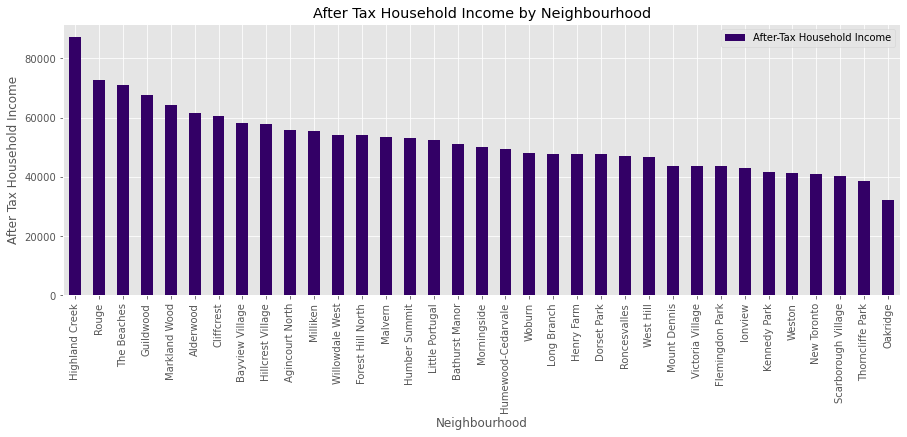

In [23]:
# Define dataframe
income_dataframe = final_locate_stats_B[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# Sort by descending order
income_dataframe.sort_values(by = 'After-Tax Household Income', ascending = False, inplace = True)

# Plot chart
mpl.style.use('ggplot')
income_dataframe.plot(kind = 'bar', figsize = (15,5), color = '#330066')
plt.title('After Tax Household Income by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('After Tax Household Income')

plt.show()

In [24]:
income_dataframe

,After-Tax Household Income
Neighbourhood,
Highland Creek,87321.0
Rouge,72784.0
The Beaches,70957.0
Guildwood,67678.0
Markland Wood,64297.0
Alderwood,61402.0
Cliffcrest,60384.0
Bayview Village,58028.0
Hillcrest Village,57682.0


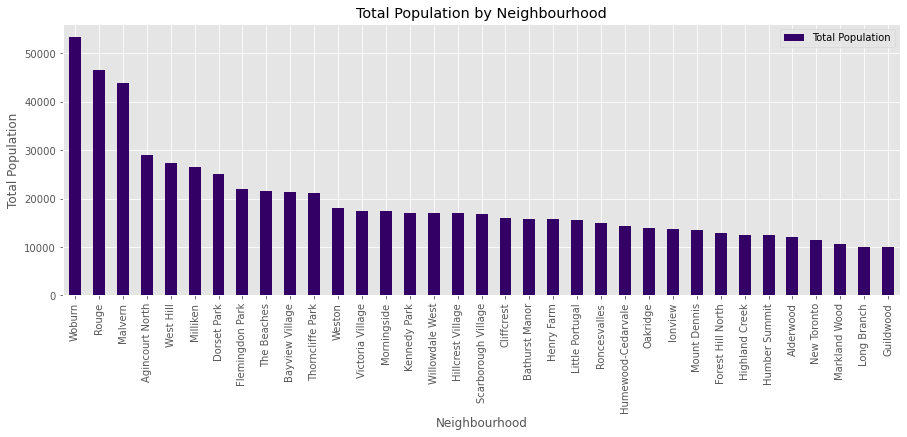

In [25]:
# Define dataframe
dataframe_pop = final_locate_stats_B[['Neighbourhood', 'Total Population']].set_index('Neighbourhood')

# Sort by descending order
dataframe_pop.sort_values(by = 'Total Population', ascending = False, inplace = True)

# Plot Chart
mpl.style.use('ggplot')
dataframe_pop.plot(kind = 'bar', figsize = (15,5), color = '#330066')
plt.title('Total Population by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Population')

plt.show()

In [26]:
dataframe_pop

,Total Population
Neighbourhood,
Woburn,53485.0
Rouge,46496.0
Malvern,43794.0
Agincourt North,29113.0
West Hill,27392.0
Milliken,26572.0
Dorset Park,25003.0
Flemingdon Park,21933.0
The Beaches,21567.0


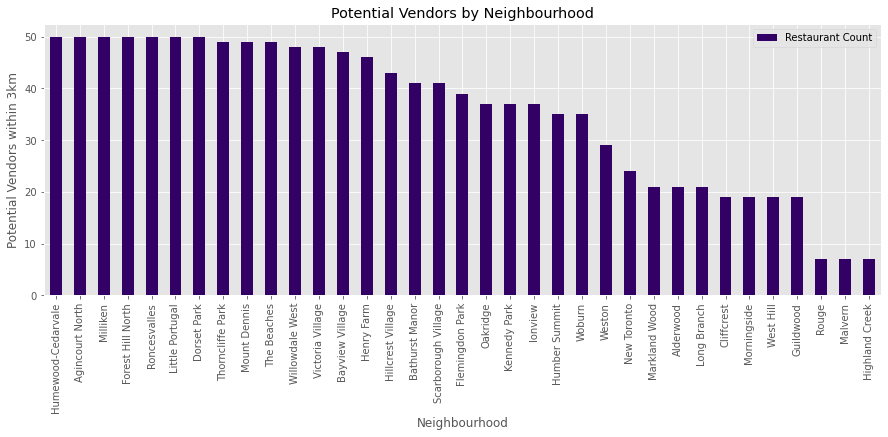

In [27]:
# Define dataframe
dataframe_po_ven = final_locate_stats_B[['Neighbourhood', 'Restaurant Count']].set_index('Neighbourhood')

# Sort by descending order
dataframe_po_ven.sort_values(by = 'Restaurant Count', ascending = False, inplace = True)

# Plot chart
mpl.style.use('ggplot')
dataframe_po_ven.plot(kind = 'bar', figsize = (15,5), color = '#330066')
plt.title('Potential Vendors by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Potential Vendors within 3km')

plt.show()

In [28]:
dataframe_po_ven

,Restaurant Count
Neighbourhood,
Humewood-Cedarvale,50
Agincourt North,50
Milliken,50
Forest Hill North,50
Roncesvalles,50
Little Portugal,50
Dorset Park,50
Thorncliffe Park,49
Mount Dennis,49


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
final_locate_stats_B

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,35
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,41
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,39
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,43


In [31]:
k = 5
final_locate_stats_C = final_locate_stats_B
cluster = final_locate_stats_C.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster.rename(columns = {0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace = True)
cluster.head(5)

,Latitude,Longitude
0,43.643515,-79.577201
1,43.605647,-79.501321
2,43.602414,-79.543484
3,43.602414,-79.543484
4,43.756303,-79.565963


In [32]:
kmeans = KMeans(n_clusters = k,random_state = 0).fit(cluster)
kmeans.labels_

Toronto_data = final_locate_stats_C
Toronto_data.insert(0, 'Cluster Labels', kmeans.labels_)
Toronto_data

,Cluster Labels,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,3,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,21
1,3,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,24
2,3,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,21
3,3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,21
4,3,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,35
5,0,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,41
6,0,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,2,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,2,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,39
9,4,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,43


In [33]:
# Create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood'], Toronto_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

Solving environment: done

# All requested packages already installed.



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


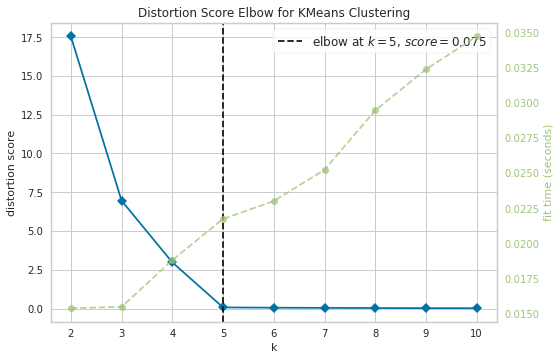

In [34]:
final_locate_stats_D = final_locate_stats_B
cluster_B = final_locate_stats_C.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster_B.rename(columns = {0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace = True)

from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualiser
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,11))

# Fit the data to the visualiser
visualizer.fit(cluster_B)

# Finalise and render the figure
visualizer.show()

In [35]:
Tonronto_data_C0 = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C0[Tonronto_data_C0["Cluster Labels"].isin([0])]
Tonronto_data_C0_mean = Tonronto_data_C0.mean()
Tonronto_data_C0_mean

Cluster Labels                    0.000000
After-Tax Household Income    50246.285714
Total Population              14872.285714
Latitude                         43.702257
Longitude                       -79.439444
Restaurant Count                 48.285714
dtype: float64

In [36]:
neighbourhood_stats = pand.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

Tonronto_data_C = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([1])]
Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

neighbourhood_stats = neighbourhood_stats.append(Toronto_data_C0_mean, ignore_index = True)
neighbourhood_stats

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,1.0,58271.125,28469.625,43.775544,-79.196466,19.25


In [37]:
incrementB = 0
neighbourhood_stats = pand.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

for x in range (0, 5):

    Tonronto_data_C = Toronto_data.drop(['Postcode','Borough'], axis = 1)
    Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([incrementB])]
    Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

    neighbourhood_stats = neighbourhood_stats.append(Toronto_data_C0_mean, ignore_index = True)
    incrementB = incrementB + 1

neighbourhood_stats

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,0.0,50246.285714,14872.285714,43.702257,-79.439444,48.285714
1,1.0,58271.125000,28469.625000,43.775544,-79.196466,19.250000
2,2.0,46855.111111,18629.444444,43.719356,-79.291146,40.555556
3,3.0,51477.666667,12427.166667,43.652861,-79.541607,25.166667
4,4.0,54945.200000,21947.600000,43.799946,-79.333027,47.200000


In [38]:
from sklearn import preprocessing

# Drop non-variables 
neighbourhood_stats_norm = neighbourhood_stats.drop(['Cluster Labels','Latitude','Longitude', ], axis = 1)

x = neighbourhood_stats_norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataframe_normalised = pand.DataFrame(x_scaled)
dataframe_normalised

,0,1,2
0,0.297054,0.152415,1.000000
1,1.000000,1.000000,0.000000
2,0.000000,0.386616,0.733771
3,0.404919,0.000000,0.203772
4,0.708661,0.593452,0.962608


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


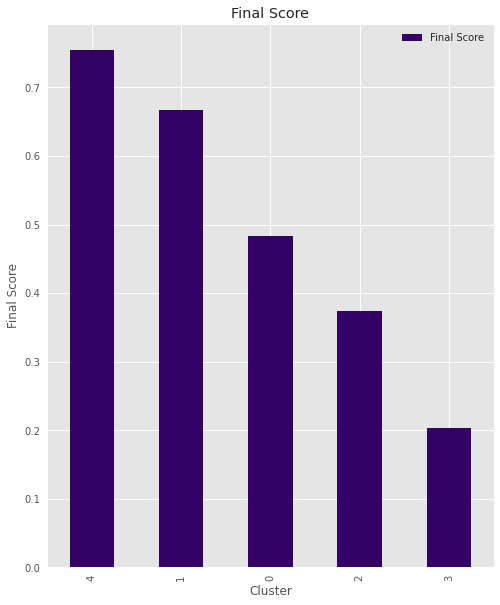

In [39]:
dataframe_normalised_final = dataframe_normalised.mean(axis=1).to_frame()
dataframe_normalised_final .rename(columns = {0:'Final Score'}, inplace = True)
dataframe_normalised_final.sort_values(by = 'Final Score', ascending = False, inplace = True)

# Plot graph
mpl.style.use('ggplot')
dataframe_normalised_final.plot(kind = 'bar', figsize = (8,10), color = '#330066')
plt.title('Final Score')
plt.xlabel('Cluster')
plt.ylabel('Final Score')

plt.show()

In [40]:
dataframe_normalised_final

,Final Score
4,0.754907
1,0.666667
0,0.483157
2,0.373462
3,0.202897
